In [24]:
import pandas as pd  # allows us to transform data
import seaborn as sns  # allows us to visualize data
import matplotlib.pyplot as plt  # allows us to visualize data

import numpy as np  # allows us to apply math functions

loading in our data...

In [47]:
hh_data = pd.read_excel('historical_data/Henry_Hub_Natural_Gas_Spot_Price.xlsx', sheet_name='main')
hh_data['week_of'] = pd.to_datetime(hh_data['week_of'])
hh_data['year'] = hh_data['week_of'].dt.year

# computing log pct changes
hh_data['log_pct_chg'] = np.log(hh_data['value'].div(hh_data['value'].shift(1))).dropna()

print(hh_data)

        week_of  value  year  log_pct_chg
0    2025-04-11   3.67  2025          NaN
1    2025-04-04   4.07  2025     0.103451
2    2025-03-28   3.92  2025    -0.037551
3    2025-03-21   4.14  2025     0.054604
4    2025-03-14   4.15  2025     0.002413
...         ...    ...   ...          ...
1468 1997-02-07   2.53  1997     0.095310
1469 1997-01-31   2.91  1997     0.139934
1470 1997-01-24   2.98  1997     0.023770
1471 1997-01-17   4.19  1997     0.340777
1472 1997-01-10   3.79  1997    -0.100335

[1473 rows x 4 columns]


In [48]:
wti_data = pd.read_excel('historical_data/Weekly_Cushing_OK_WTI_Spot_Price_FOB.xlsx', sheet_name='main')
wti_data['week_of'] = pd.to_datetime(wti_data['week_of'])
wti_data['year'] = wti_data['week_of'].dt.year

# computing log pct changes
wti_data['log_pct_chg'] = np.log(wti_data['value'].div(wti_data['value'].shift(1))).dropna()

print(wti_data)

        week_of  value  year  log_pct_chg
0    2025-04-11  61.24  2025          NaN
1    2025-04-04  69.09  2025     0.120609
2    2025-03-28  69.81  2025     0.010367
3    2025-03-21  67.96  2025    -0.026858
4    2025-03-14  66.95  2025    -0.014973
...         ...    ...   ...          ...
2043 1986-01-31  19.69  1986     0.163505
2044 1986-01-24  20.31  1986     0.031002
2045 1986-01-17  24.57  1986     0.190413
2046 1986-01-10  25.99  1986     0.056186
2047 1986-01-03  25.78  1986    -0.008113

[2048 rows x 4 columns]


In [49]:
ng_st = pd.read_excel('historical_data/ngshistory_storage.xlsx', sheet_name='main')
ng_st['week_of'] = pd.to_datetime(ng_st['week_of'])
ng_st['year'] = ng_st['week_of'].dt.year

# computing log pct changes
ng_st['log_pct_chg'] = np.log(wti_data['value'].div(wti_data['value'].shift(1))).dropna()

print(ng_st)

       week_of                        Source  East Region  Midwest Region  \
0   2010-01-01  Derived EIA Weekly Estimates          769             900   
1   2010-01-08  Derived EIA Weekly Estimates          703             820   
2   2010-01-15  Derived EIA Weekly Estimates          642             750   
3   2010-01-22  Derived EIA Weekly Estimates          616             710   
4   2010-01-29  Derived EIA Weekly Estimates          582             661   
..         ...                           ...          ...             ...   
792 2025-03-07                       EIA-912          307             370   
793 2025-03-14                       EIA-912          295             366   
794 2025-03-21                       EIA-912          298             367   
795 2025-03-28                       EIA-912          284             364   
796 2025-04-04                       EIA-912          296             373   

     Mountain Region  Pacific Region  South Central Region  Salt  NonSalt  

visualizing the data we are using before any calculation application

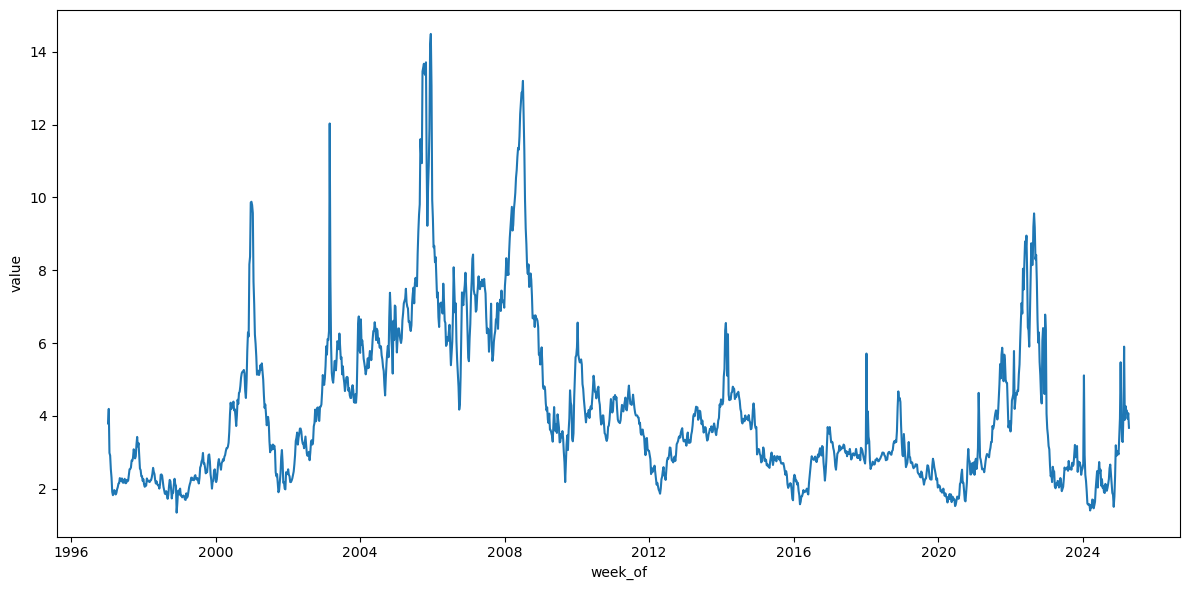

In [51]:
# visualizing hh
plt.figure(figsize=(12, 6))
sns.lineplot(data=hh_data, x='week_of', y='value')

plt.tight_layout()
plt.show()

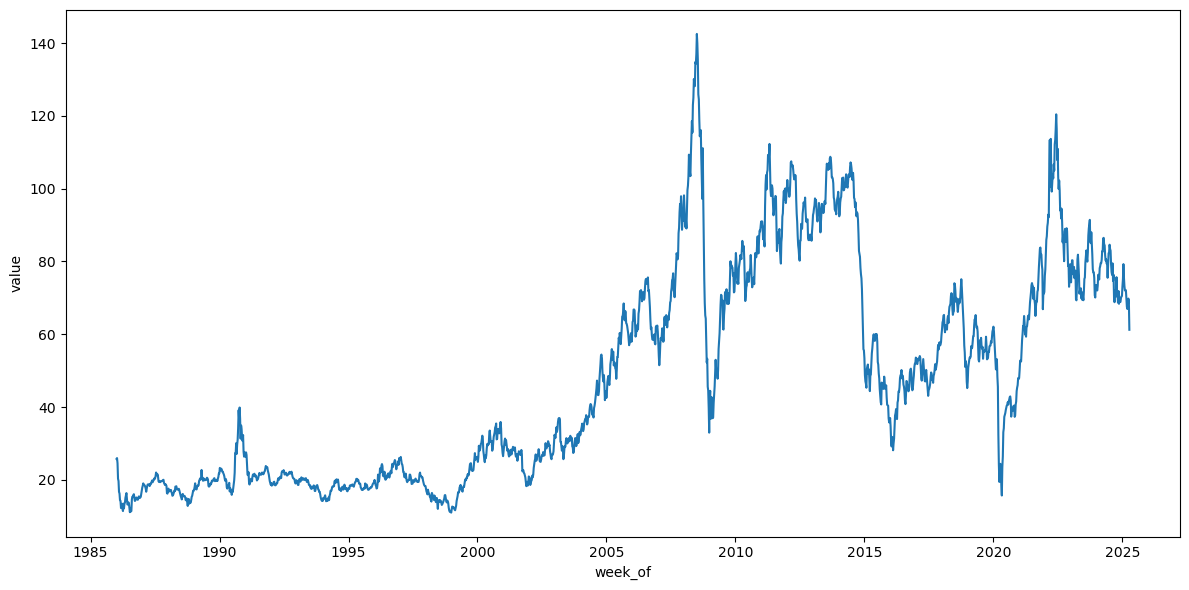

In [52]:
# visualizing wti
plt.figure(figsize=(12, 6))
sns.lineplot(data=wti_data, x='week_of', y='value')
plt.tight_layout()
plt.show()

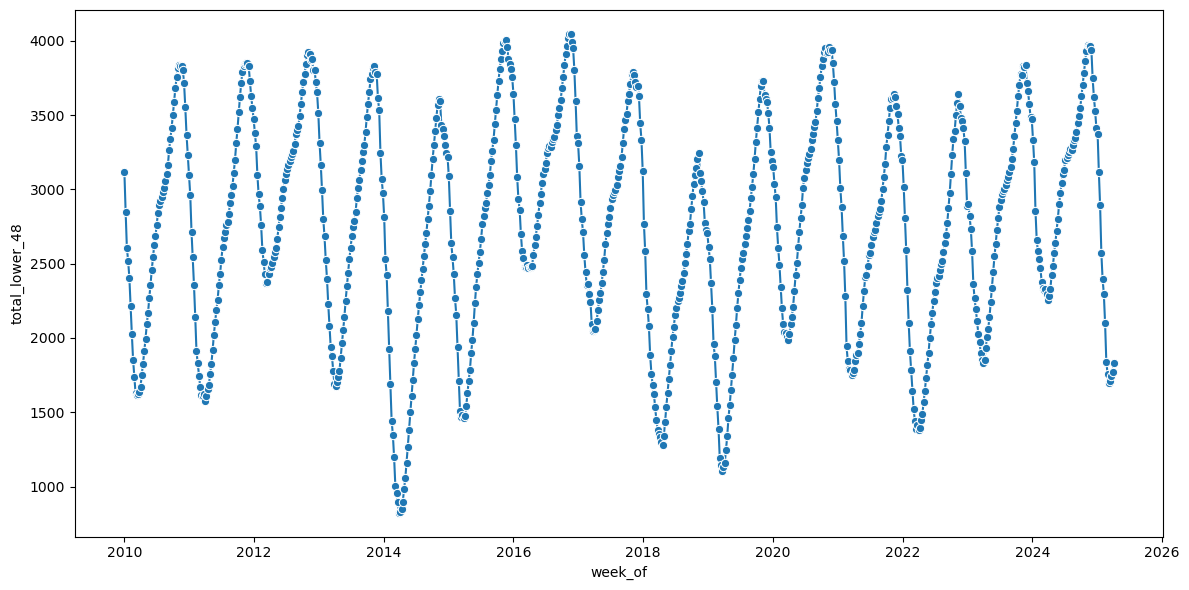

In [53]:
# visualizing storage
plt.figure(figsize=(12, 6))
sns.lineplot(data=ng_st, x='week_of', y='total_lower_48', marker='o')
plt.tight_layout()
plt.show()

calculating weekly returns and standard deviation
hh_data
wti_data
nat_gas_st

In [54]:
hh_data['pct_chg'] = hh_data['value'].pct_change()
wti_data['pct_chg'] = wti_data['value'].pct_change()
ng_st['pct_chg'] = ng_st['total_lower_48'].pct_change()

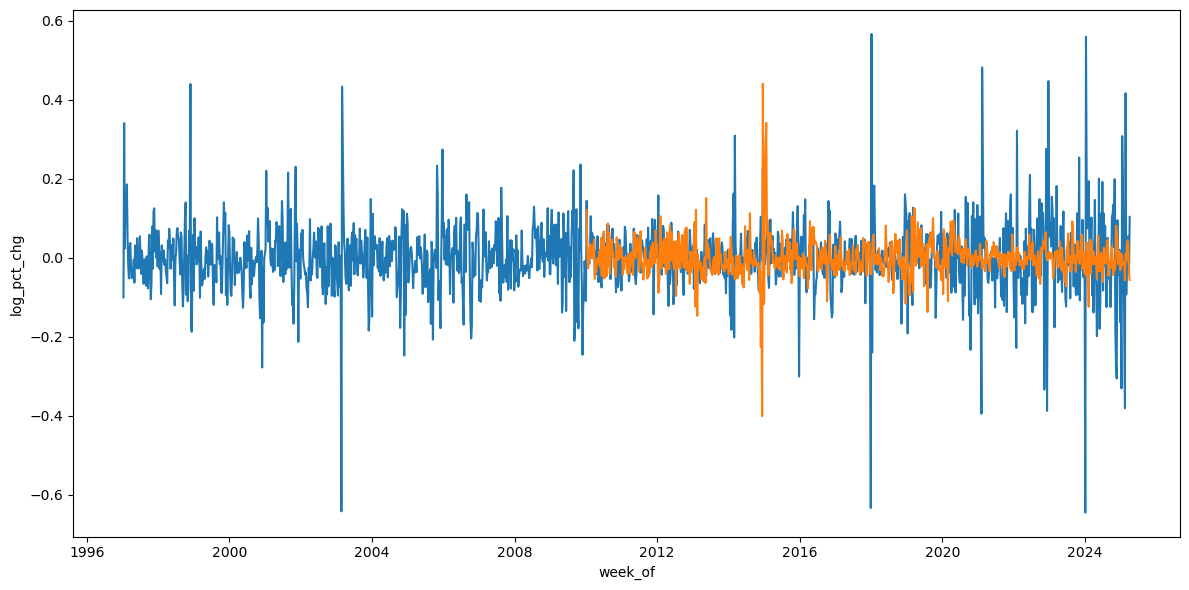

In [56]:
# visualizing pct change
plt.figure(figsize=(12, 6))

sns.lineplot(data=hh_data, x='week_of', y='log_pct_chg')
sns.lineplot(data=ng_st, x='week_of', y='log_pct_chg')

plt.tight_layout()
plt.show()

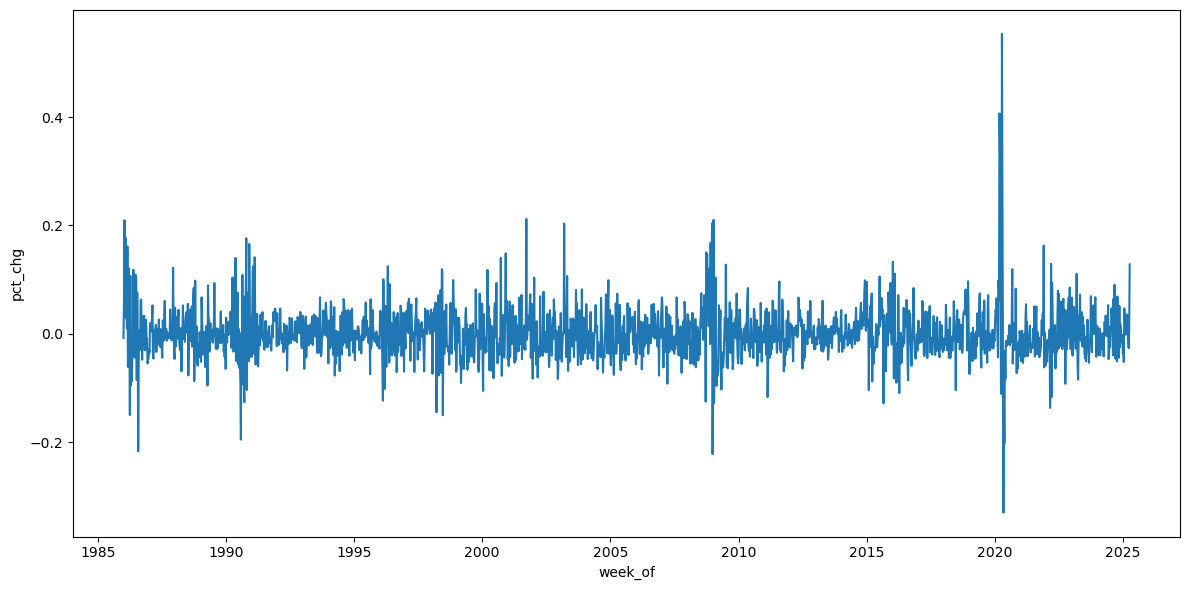

In [58]:
# visualizing pct change
plt.figure(figsize=(12, 6))

sns.lineplot(data=wti_data, x='week_of', y='pct_chg')

plt.tight_layout()
plt.show()

calculating standard deviation and 4 (1 month) week, 24 (6 month) week and 48 (12 month) week
rolling volatitility

In [59]:
# iterate and calculate std for each dataset
std_all_wti = wti_data['pct_chg'].std()
print(f'Standard deviation of all WTI prices: {std_all_wti:.4f}')

std_all_hh = hh_data['pct_chg'].std()
print(f'Standard deviation of all WTI prices: {std_all_hh:.4f}')

std_all_ngs = ng_st['pct_chg'].std()
print(f'Standard deviation of all WTI prices: {std_all_ngs:.4f}')


Standard deviation of all WTI prices: 0.0474
Standard deviation of all WTI prices: 0.0910
Standard deviation of all WTI prices: 0.0406


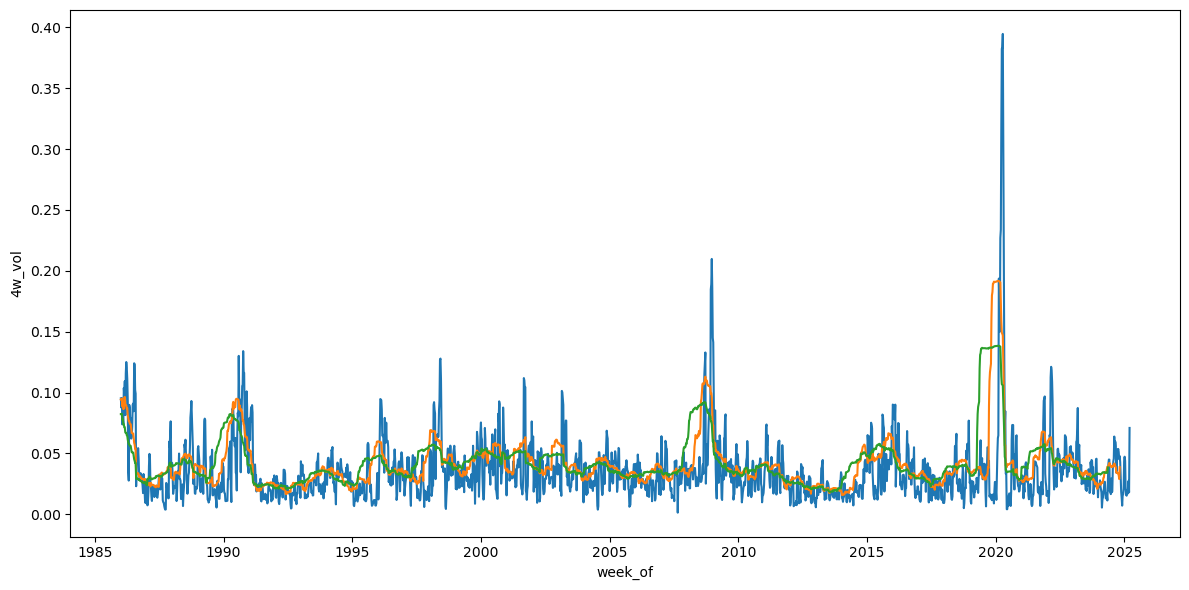

In [60]:
# rolling standard deviations for wti
wti_data['4w_vol'] = wti_data['pct_chg'].rolling(window=4).std()
wti_data['24w_vol'] = wti_data['pct_chg'].rolling(window=24).std()
wti_data['48w_vol'] = wti_data['pct_chg'].rolling(window=48).std()


# visualizing rolling vol
plt.figure(figsize=(12, 6))

sns.lineplot(data=wti_data, x='week_of', y='4w_vol')
sns.lineplot(data=wti_data, x='week_of', y='24w_vol')
sns.lineplot(data=wti_data, x='week_of', y='48w_vol')

plt.tight_layout()
plt.show()

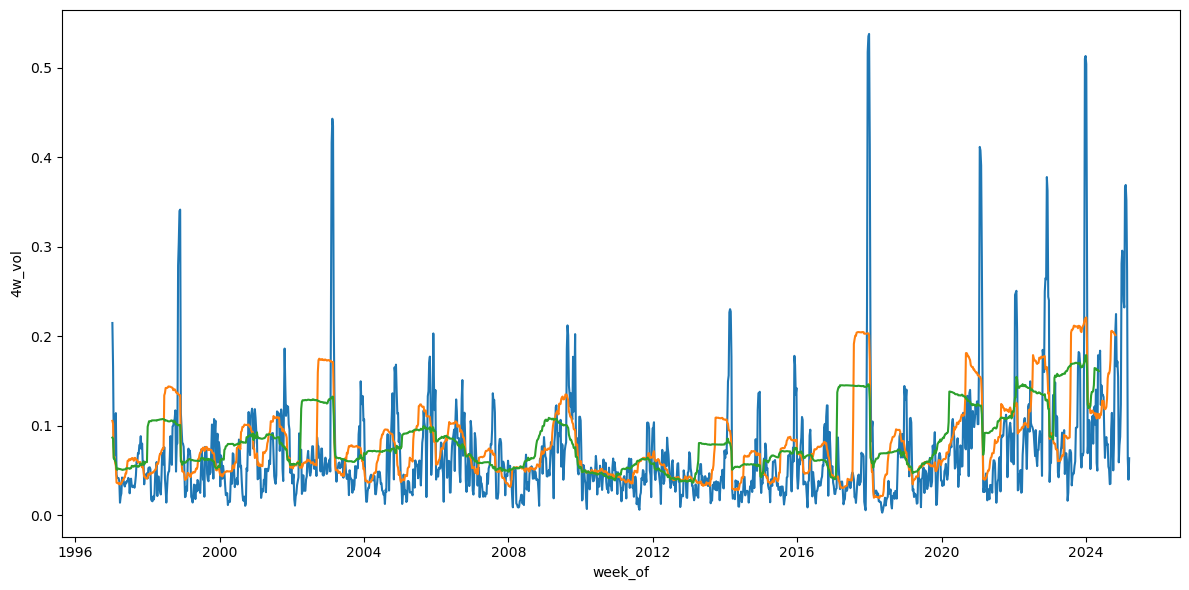

In [61]:
# rolling standard deviations for hh
hh_data['4w_vol'] = hh_data['pct_chg'].rolling(window=4).std()
hh_data['24w_vol'] = hh_data['pct_chg'].rolling(window=24).std()
hh_data['48w_vol'] = hh_data['pct_chg'].rolling(window=48).std()


# visualizing rolling vol
plt.figure(figsize=(12, 6))

sns.lineplot(data=hh_data, x='week_of', y='4w_vol')
sns.lineplot(data=hh_data, x='week_of', y='24w_vol')
sns.lineplot(data=hh_data, x='week_of', y='48w_vol')

plt.tight_layout()
plt.show()

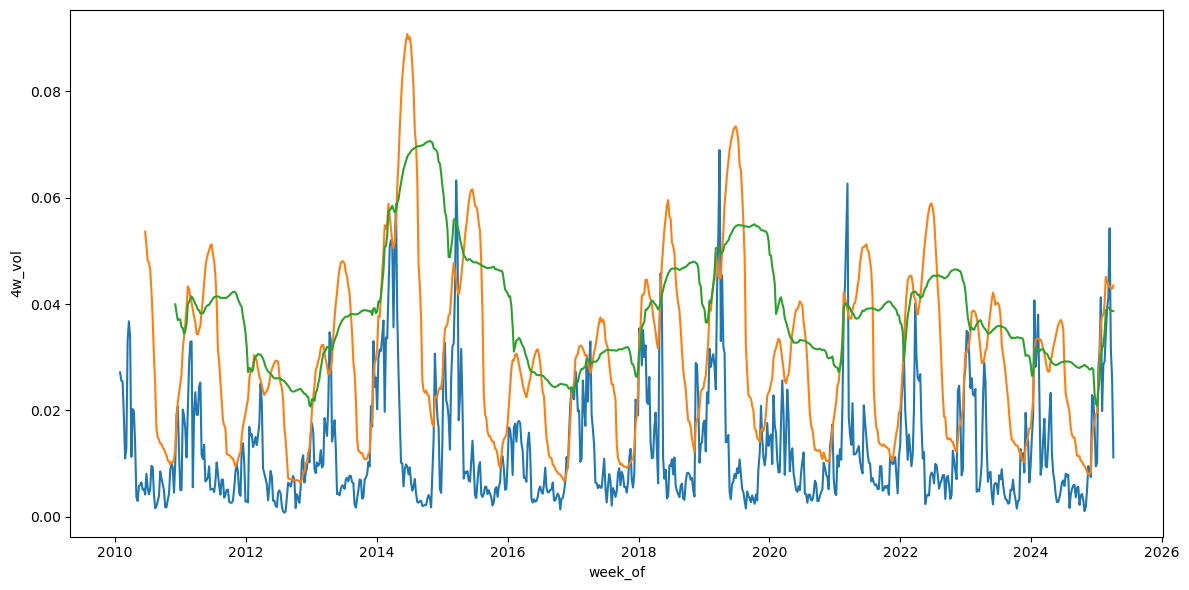

In [62]:
# rolling standard deviations for hh
ng_st['4w_vol'] = ng_st['pct_chg'].rolling(window=4).std()
ng_st['24w_vol'] = ng_st['pct_chg'].rolling(window=24).std()
ng_st['48w_vol'] = ng_st['pct_chg'].rolling(window=48).std()


# visualizing rolling vol
plt.figure(figsize=(12, 6))

sns.lineplot(data=ng_st, x='week_of', y='4w_vol')
sns.lineplot(data=ng_st, x='week_of', y='24w_vol')
sns.lineplot(data=ng_st, x='week_of', y='48w_vol')

plt.tight_layout()
plt.show()

we are going to look at the distribution of pricing by year, 

for now, let's focus on 2015 - 2024 period (9 years)

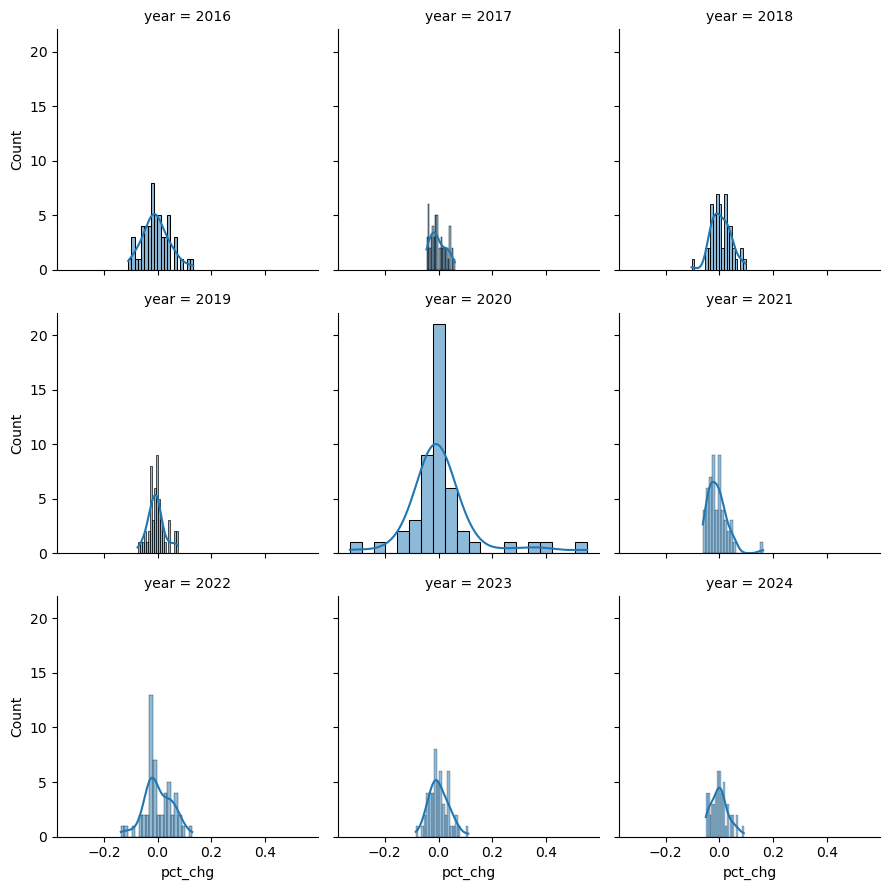

In [63]:
# first looking at WTI pct chg for period 2015 - 2024
wti_filtered = wti_data[wti_data['week_of'].between('2016-01-01', '2024-12-31')]

wti_chg_by_yr = wti_filtered.dropna(subset=['pct_chg'])
g = sns.FacetGrid(wti_chg_by_yr, col='year', col_wrap=3, height=3, sharex=True, sharey=True)
g.map(sns.histplot, 'pct_chg', bins=20, kde=True)

plt.show()

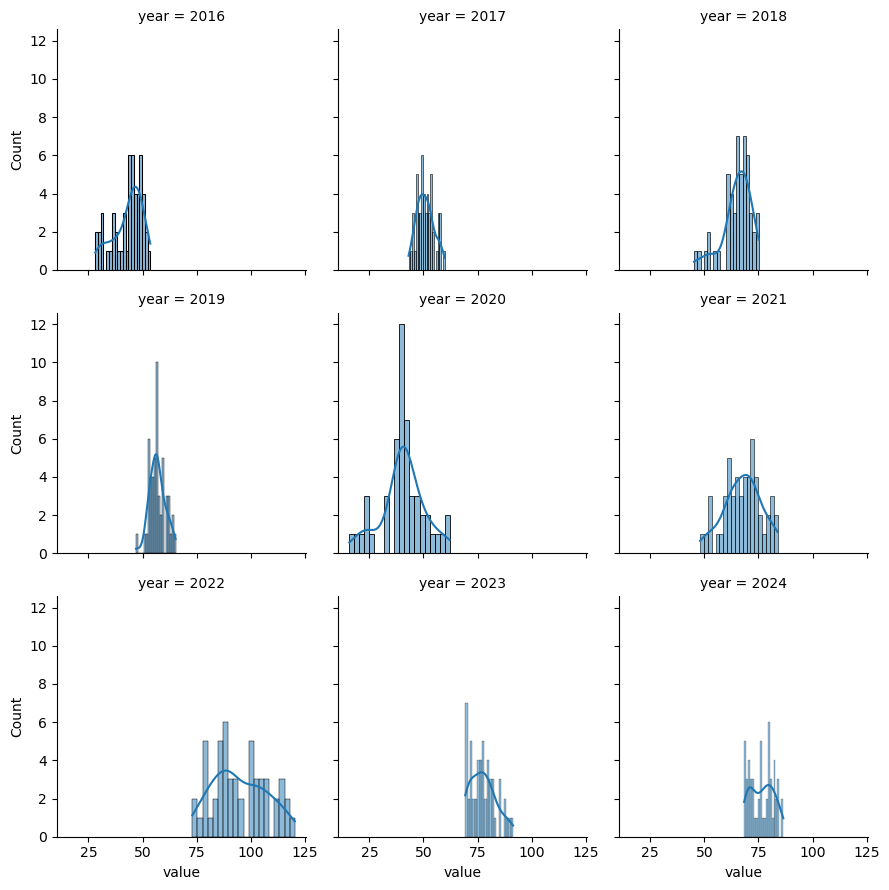

In [64]:
# next looking at WTI price distribution for period 2015 - 2024
g = sns.FacetGrid(wti_filtered, col='year', col_wrap=3, height=3, sharex=True, sharey=True)
g.map(sns.histplot, 'value', bins=20, kde=True)

plt.show()

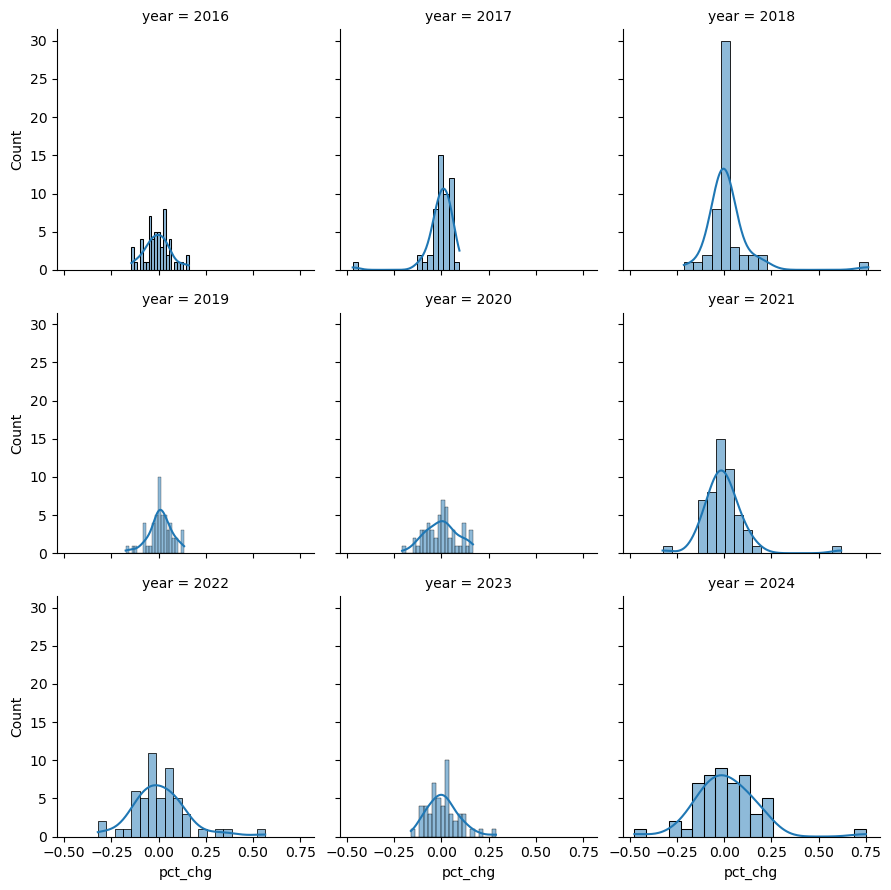

In [65]:
# second looking at HH pct chg for period 2015 - 2024
hh_filtered = hh_data[hh_data['week_of'].between('2016-01-01', '2024-12-31')]

hh_chg_by_yr = hh_filtered.dropna(subset=['pct_chg'])
g = sns.FacetGrid(hh_chg_by_yr, col='year', col_wrap=3, height=3, sharex=True, sharey=True)
g.map(sns.histplot, 'pct_chg', bins=20, kde=True)

plt.show()

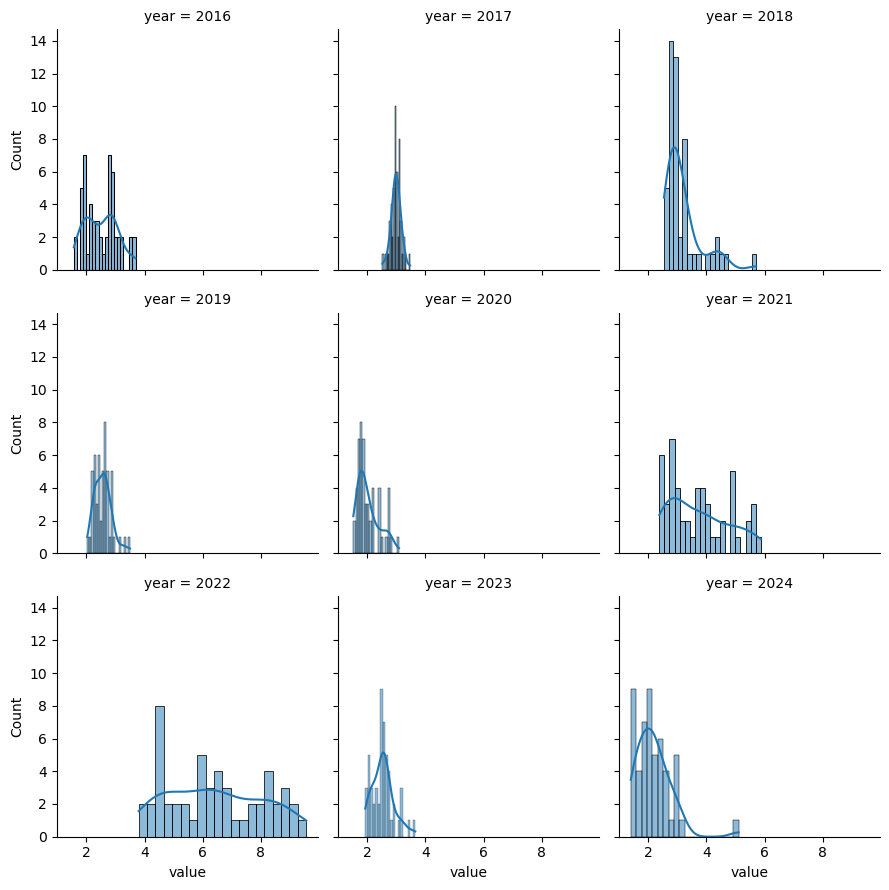

In [66]:
# next looking at HH price distribution for period 2016 - 2024
g = sns.FacetGrid(hh_filtered, col='year', col_wrap=3, height=3, sharex=True, sharey=True)
g.map(sns.histplot, 'value', bins=20, kde=True)

plt.show()